# Basic equations
Let's show action and equations of motion first (see double inflation.ipynb)
$$
S=\int d^4x\sqrt{-g}\left[\frac{M_\text{P}^2}{2}R-\frac{1}{2}(\partial\phi)^2-\frac{f(\phi)}{2}(\partial\chi)^2-V(\phi,\chi)\right]
$$
The equation of motion:
$$\phi''=-(3-\frac{\rho+p}{2M^2_\rm P H^2}+\frac{\Gamma^\phi}{H})\phi'-\frac{V_\phi}{H^2}+b_\phi e^{2b}\chi'^2\,.$$
$$\chi''=-(3-\frac{\rho+p}{2M^2_\rm P H^2}+\frac{\Gamma^\chi}{H}+2b_\phi \phi')\chi'-e^{-2b}\frac{V_\chi}{H^2}\,.$$
Continuity equation and Friedman equation：
$$\rho'_r=-4\rho_r+H\Gamma_r^\phi\phi'^2+H\Gamma_r^\chi e^{2b}\chi'^2$$
$$\rho'_m=-3\rho_m+H\Gamma_m^\phi\phi'^2+H\Gamma_m^\chi e^{2b}\chi'^2$$
$$H'=-\frac{\rho+p}{2M^2_\rm P H}=\frac{1}{2M_\rm P ^2H}(\frac{4}{3}\rho_r+\rho_m+H^2\phi'^2+H^2e^{2b}\chi'^2)$$
where $$\rho+p=\frac{4}{3}\rho_r+\rho_m+H^2\phi'^2+H^2e^{2b}\chi'^2$$
$$\Gamma_\phi=\Gamma_r^\phi+\Gamma_m^\phi\qquad \Gamma_\chi=\Gamma_r^\chi+\Gamma_m^\chi$$ and the density of inflations are
$$\rho'_\phi=-3H^2\phi'^2-H\Gamma^\phi\phi'^2+b_\phi e^{2b}\phi'\chi'^2  H^2$$
$$\rho'_\chi=-3H^2\chi'^2-H\Gamma^\chi e^{2b}\chi'^2-b_\phi e^{2b}\phi'\chi'^2H^2 $$
we consider the KKLT model
$$V(\phi,\chi) = \frac{1}{2}m_\phi^2\phi^2 + V_0\frac{\chi^2}{\chi_0^2+\chi^2}\,, b(\phi)=b_1\phi$$
where $b_1$ is a constant with dimensions $M_p^{-1}$.

# Initial values selection
we follow Ref.[1] selecting 
$$\chi_0=0.06M_p\,,\quad m_\phi=6\chi_0\,,\quad V_0=\frac{(m_\phi\cdot M_p)^2}{1.2}\,,\quad \phi=16M_p\,, \quad \chi=0.96M_p \,,\quad \dot\phi\sim\dot\chi\sim 0$$
where $M_p$ is the Plank mass. In addition to this, we can also adjust the following quantities:
$$b=1\,,\quad \Gamma^\phi_ r=10^{-7}\,,\quad \Gamma^\phi_ m=10^{-9}\,,\quad \Gamma^\chi_ m=10^{-7}\,,\quad \Gamma^\chi_ m=10^{-9}$$
The quantities we draw have been dimensionless, such as $\phi=\phi/M_\rm p$

In [3]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
from sympy import symbols, Eq, solve
import math


def e2b(phi):
    return math.e**(2*b*phi)
def em2b(phi):
    return math.e**(-2*b*phi)
def b_phi(phi):
    return b
def V_phi(phi):
    return mphi**2*phi/m_p**3
def V_chi(chi):
    return (2*V0*chi/(chi0**2+chi**2)-2*chi**3*V0/((chi0**2+chi**2)**2))/m_p**3
def Vp(phi,chi):
    return (V0*chi**2/(chi0**2+chi**2)+mphi**2*phi**2/2)/(m_p**4)

# defination above should be changed for different models
m_p=1#plank mass
b=1
chi0=0.09*m_p
mphi=6*chi0
V0=mphi**2**m_p**2/5

phii=16*m_p
chii=0.96*m_p
phi_Ni=1e-10
chi_Ni=1e-10
phi=phii
chi=chii
Hi=(Vp(phi,chi)/ 3)**0.5



def sys(t, var):#here, t actully is N, to avoid naming trouble later, we will briefly use t here.
    phi,chi,phi_N,chi_N,H = var
    dphidN=phi_N
    dchidN=chi_N
    dphi_NdN = -(3-1/2*(phi_N**2+e2b(phi)*chi_N**2))*phi_N-V_phi(phi)/(H**2)+b_phi(phi)*e2b(phi)*chi_N**2
    dchi_NdN = -(3-1/2*(phi_N**2+e2b(phi)*chi_N**2)+2*b_phi(phi)*phi_N)*chi_N-em2b(phi)*V_chi(chi)/(H**2)
    dHdN=-1/2*H*(phi_N**2+e2b(phi)*chi_N**2)
    return [dphidN,dchidN,dphi_NdN,dchi_NdN,dHdN]
NN = np.arange(0, 110, 0.01)  # Time points where solution is needed
sol = solve_ivp(sys, [NN[0], NN[-1]], [phii,chii, phi_Ni,chi_Ni,Hi], rtol=1e-7, atol=1e-7, t_eval=NN,method='RK45')
N = sol.t
phi,chi, phi_N,chi_N,H = sol.y

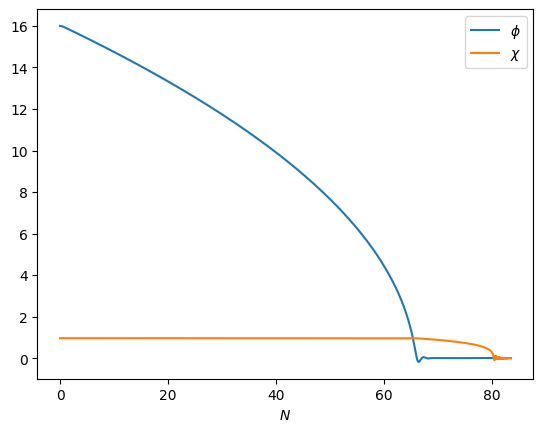

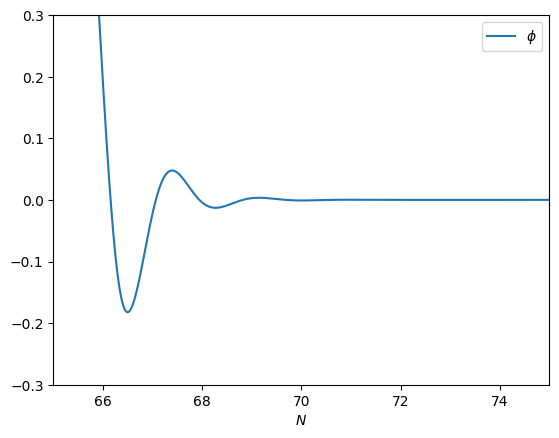

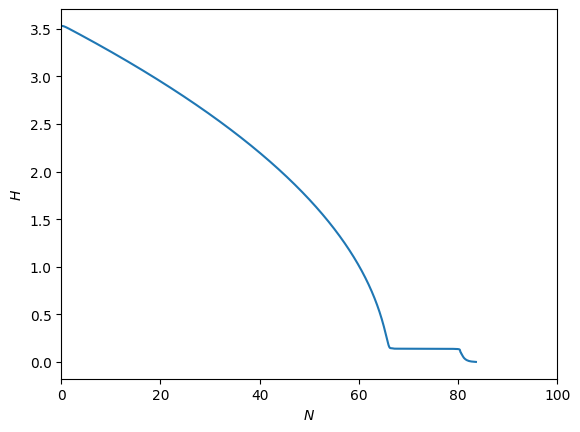

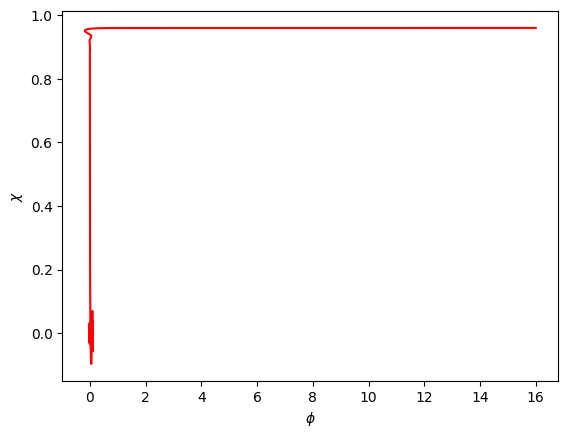

In [6]:
plt.plot(N, phi, label=r'$\phi$')
plt.plot(N, chi, label=r'$\chi$')
plt.xlabel(r'$N$')
plt.legend()
plt.show()
plt.plot(N, phi, label=r'$\phi$')
plt.xlabel(r'$N$')
plt.xlim(65,75)
plt.ylim(-0.3,0.3)
plt.legend()
plt.show()
plt.plot(N,H)
plt.xlabel(r'$N$')
plt.ylabel(r'$H$')
# plt.yscale('log')
plt.xlim(0,100)
plt.show()

plt.plot(phi, chi, 'r')
plt.xlabel(r'$\phi$')
plt.ylabel(r'$\chi$')
plt.show()

## Slow roll parameters

$$\epsilon_H=-\frac{\dot H}{H^2}=\frac{1}{2}(\phi\prime^2+e^{2b}\chi\prime^2)$$

<!-- $$\eta_H=\frac{\ddot \phi}{H\dot\phi}=\epsilon_H+\frac{1}{2\epsilon_H}\frac{d\epsilon_H}{dN}$$
However, in this note we use the defination: -->
$$\eta_H=\frac{\dot\epsilon_H}{H\epsilon_H}=\frac{\epsilon_H'}{\epsilon_H}=\frac{\phi'\phi''+e^{2b}\chi'\chi''+b_\phi e^{2b}\chi'^2}{\epsilon_H}$$
There is a difference here from Ref[1], probably because of the different definition of $\eta_H$

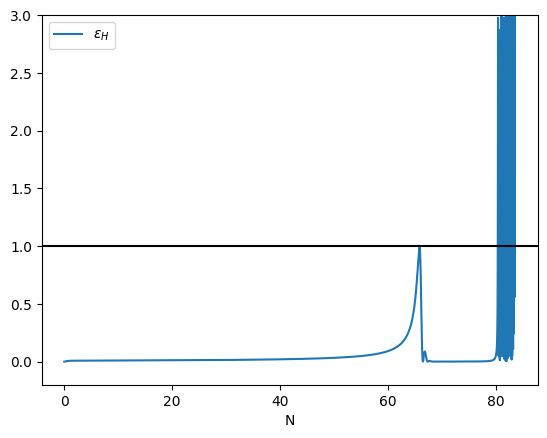

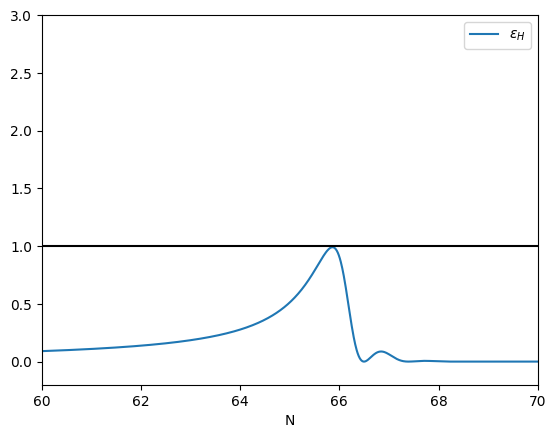

In [8]:
eps=0.5*(phi_N**2+e2b(phi)*chi_N**2)
plt.plot(N, eps, label=r'$\epsilon_H$')
plt.axhline(1, color='black')
plt.legend()
plt.xlabel('N')
plt.ylim(-0.2,3)
plt.show()
plt.plot(N, eps, label=r'$\epsilon_H$')
plt.axhline(1, color='black')
plt.legend()
plt.xlabel('N')
plt.xlim(60,70)
plt.ylim(-0.2,3)
plt.show()

# References
[1] Braglia, Matteo, et al. "Generating primordial features at large scales in two field models of inflation." Journal of Cosmology and Astroparticle Physics 2020.08 (2020): 025.